In [2]:
import cifar10
import pandas as pd
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

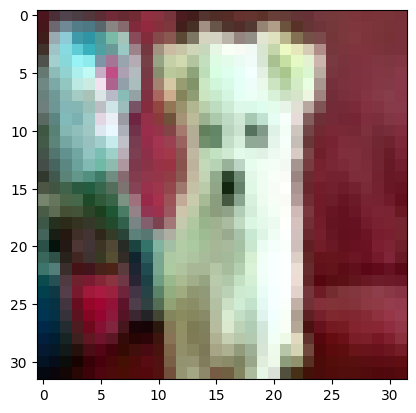

In [4]:
i = random.randint(1,300)
plt.imshow(X_train[i])

In [5]:
X_train_gray = np.sum(X_train / 3, axis = 3, keepdims=True)

In [6]:
X_test_gray = np.sum(X_test / 3, axis = 3, keepdims=True)

[2]


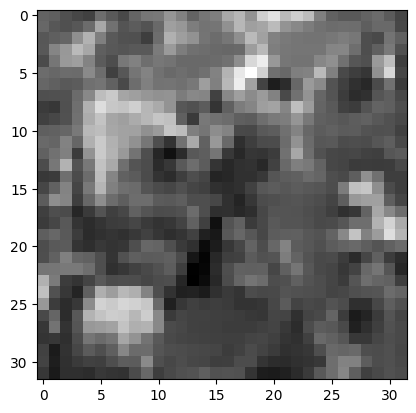

In [17]:
plt.imshow(X_train_gray[300], cmap='gray')
print(y_train[300])

In [18]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128

In [19]:
print(np.max(y_train))

9


In [20]:
LeNet = tf.keras.Sequential()
LeNet.add(tf.keras.layers.Conv2D(6, (5,5), activation='relu', input_shape=(32,32,1)))
LeNet.add(tf.keras.layers.AveragePooling2D())
LeNet.add(tf.keras.layers.Conv2D(16, (5,5), activation='relu'))
LeNet.add(tf.keras.layers.AveragePooling2D())
LeNet.add(tf.keras.layers.Flatten())
LeNet.add(tf.keras.layers.Dense(120, activation='relu'))
LeNet.add(tf.keras.layers.Dense(84, activation='relu'))
LeNet.add(tf.keras.layers.Dense(10, activation='softmax'))

In [24]:
LeNet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = LeNet.fit(X_train_gray_norm, y_train, batch_size=500, epochs=10)

Epoch 1/10
100/100 [==============================] - 8s 70ms/step - loss: 0.0963 - accuracy: 0.9686
Epoch 2/10
100/100 [==============================] - 7s 68ms/step - loss: 0.0552 - accuracy: 0.9861
Epoch 3/10
100/100 [==============================] - 7s 68ms/step - loss: 0.0616 - accuracy: 0.9834
Epoch 4/10
100/100 [==============================] - 7s 67ms/step - loss: 0.1250 - accuracy: 0.9547
Epoch 5/10
100/100 [==============================] - 7s 67ms/step - loss: 0.1323 - accuracy: 0.9520
Epoch 6/10
100/100 [==============================] - 7s 67ms/step - loss: 0.0705 - accuracy: 0.9784
Epoch 7/10
100/100 [==============================] - 7s 67ms/step - loss: 0.0500 - accuracy: 0.9883
Epoch 8/10
100/100 [==============================] - 7s 67ms/step - loss: 0.0429 - accuracy: 0.9915
Epoch 9/10
100/100 [==============================] - 7s 69ms/step - loss: 0.0390 - accuracy: 0.9931
Epoch 10/10
100/100 [==============================] - 7s 68ms/step - loss: 0.0489 - accura

313/313 [==============================] - 1s 4ms/step


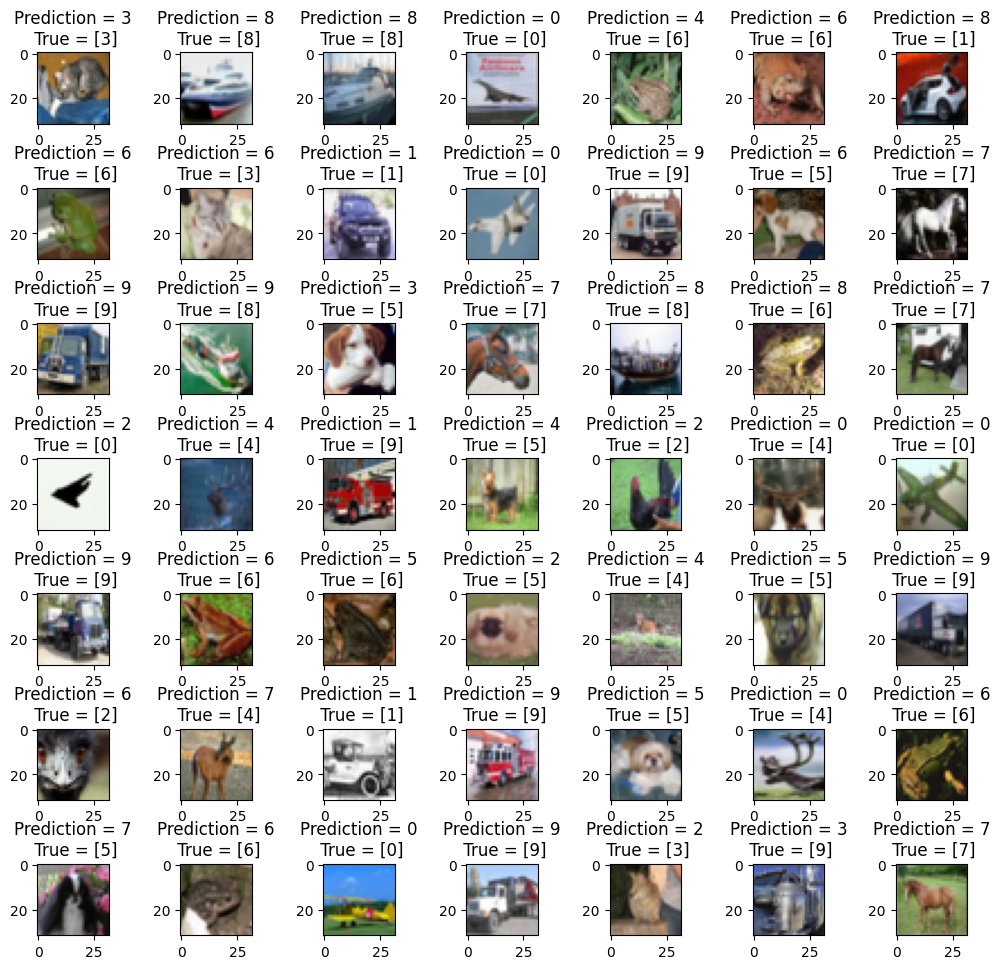

In [26]:
L = 7
W = 7

predicted_classes = np.argmax(LeNet.predict(X_test_gray_norm), axis=1)
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()
y_true = y_test

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))

plt.subplots_adjust(wspace=1)